In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle

In [7]:
movie = pd.read_csv('movies.csv') 

In [9]:
credit = pd.read_csv('credits.csv') 

In [11]:
movie = movie.merge(credit, on = 'title')

In [13]:
movie.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [15]:
#important column that will help to make this 
# genres , id(for thumbnail or poster), keywords, title , overview, cast, crew

movie = movie[['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew' , 'release_date', 'vote_average','vote_count']]

In [17]:
movie.isnull().sum()

movie_id        0
title           0
overview        3
genres          0
keywords        0
cast            0
crew            0
release_date    1
vote_average    0
vote_count      0
dtype: int64

In [23]:
movie.dropna(inplace = True)

In [27]:
movie.head()
saved_movie_data = movie

In [29]:

saved_movie_data.head()

,movie_id,title,overview,genres,keywords,cast,crew,release_date,vote_average,vote_count
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19,6.9,4500
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015-10-26,6.3,4466
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012-07-16,7.6,9106
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012-03-07,6.1,2124


In [33]:
def convert(obj):
    list = []
    for i in ast.literal_eval(obj):
        list.append(i['name'])
    return list

In [35]:
import ast

In [37]:
movie['genres']=movie['genres'].apply(convert)

In [39]:
movie['keywords'] = movie['keywords'].apply(convert)

In [41]:
def convert2(obj):
    list = []
    counter =0
    for i in ast.literal_eval(obj):
        if counter != 3:
            list.append(i['name'])
            counter+=1
        else:
            break
            
        
    return list

In [43]:
movie['cast'] =movie['cast'].apply(convert2)

In [44]:
movie.head()

,movie_id,title,overview,genres,keywords,cast,crew,release_date,vote_average,vote_count
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009-12-10,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007-05-19,6.9,4500
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015-10-26,6.3,4466
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012-07-16,7.6,9106
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012-03-07,6.1,2124


In [47]:
movie['cast'] = movie['cast'].apply(lambda x:x[0:3])

In [49]:
def fetch_director(text):
    list = []
    for i in  ast.literal_eval(text):
        if i['job'] == 'Director':
            list.append(i['name'])
    return list 

In [51]:
movie['crew'] = movie['crew'].apply(fetch_director)

In [52]:
movie.sample(5)

,movie_id,title,overview,genres,keywords,cast,crew,release_date,vote_average,vote_count
3456,16158,The Wood,"In the panicky, uncertain hours before his wed...","[Comedy, Drama, Romance]",[],"[Omar Epps, Richard T. Jones, Taye Diggs]",[Rick Famuyiwa],1999-07-16,7.1,34
1151,18240,The Proposal,When she learns she's in danger of losing her ...,"[Comedy, Romance, Drama]","[fictitious marriage, deportation, immigration...","[Sandra Bullock, Ryan Reynolds, Mary Steenburgen]",[Anne Fletcher],2009-06-01,6.7,1804
4448,14014,The Hammer,"Approaching forty, Ferro is unsatisfied with h...",[Comedy],"[transporter, sport, independent film]","[Adam Carolla, Oswaldo Castillo, Harold House ...",[Charles Herman-Wurmfeld],2007-04-01,6.5,15
529,9567,Tears of the Sun,Navy SEAL Lieutenant A.K. Waters and his elite...,"[Action, Drama, War]","[u.s. army, nigeria, president]","[Bruce Willis, Monica Bellucci, Cole Hauser]",[Antoine Fuqua],2003-03-07,6.4,573
2311,244339,Out of Inferno,"On the hottest day in 50 years, a serious fire...",[Action],[],"[Lau Ching-Wan, Angelica Lee, Chen Sicheng]","[Danny Pang, Oxide Pang Chun]",2013-03-10,5.8,11


In [55]:
print(movie['crew'].head())
print(type(movie['crew'].iloc[0]))

0        [James Cameron]
1       [Gore Verbinski]
2           [Sam Mendes]
3    [Christopher Nolan]
4       [Andrew Stanton]
Name: crew, dtype: object
<class 'list'>


In [57]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [59]:
movie['cast'] = movie['cast'].apply(collapse)
movie['crew'] = movie['crew'].apply(collapse)
movie['genres'] = movie['genres'].apply(collapse)
movie['keywords'] = movie['keywords'].apply(collapse)

In [61]:
movie.head()

,movie_id,title,overview,genres,keywords,cast,crew,release_date,vote_average,vote_count
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],2009-12-10,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],2007-05-19,6.9,4500
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],2015-10-26,6.3,4466
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],2012-07-16,7.6,9106
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],2012-03-07,6.1,2124


In [63]:
movie['overview'] = movie['overview'].apply(lambda x:x.split())

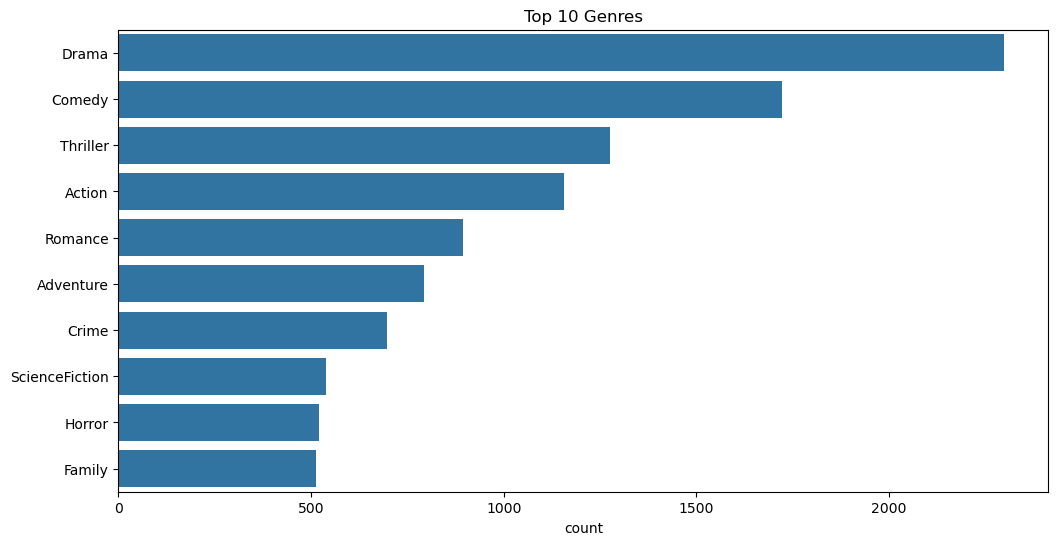

In [65]:
# Split genres into individual terms


# Assuming 'movie' is a DataFrame
all_genres = [genre for genres in movie['genres'] for genre in genres]

plt.figure(figsize=(12, 6))
sns.countplot(y=all_genres, order=pd.Series(all_genres).value_counts().index[:10])
plt.title('Top 10 Genres')
plt.show()

In [67]:
# Extract release year
movie['release_year'] = pd.to_datetime(movie['release_date']).dt.year

In [69]:
movie.head()

,movie_id,title,overview,genres,keywords,cast,crew,release_date,vote_average,vote_count,release_year
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],2009-12-10,7.2,11800,2009
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],2007-05-19,6.9,4500,2007
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],2015-10-26,6.3,4466,2015
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],2012-07-16,7.6,9106,2012
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],2012-03-07,6.1,2124,2012


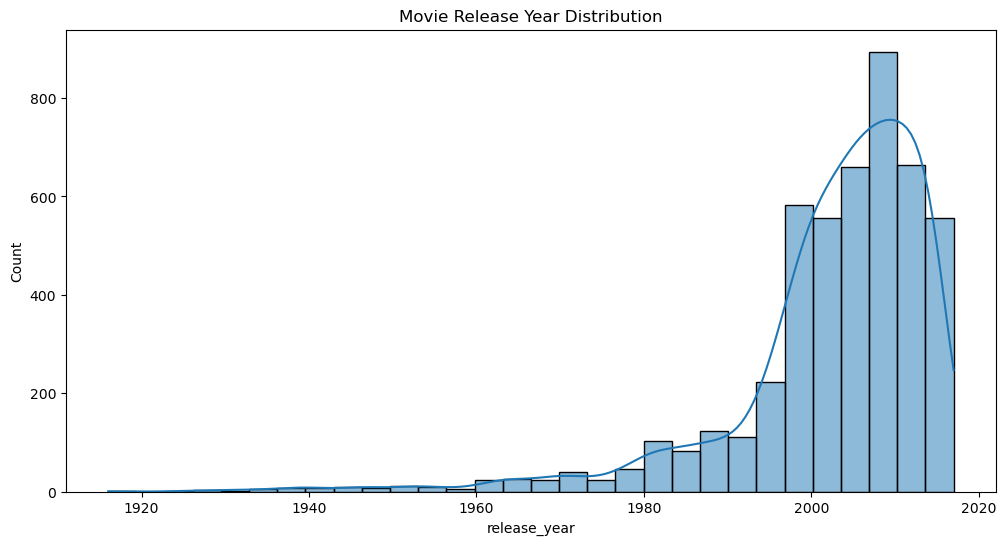

In [71]:
# Plot distribution
plt.figure(figsize=(12, 6))
sns.histplot(movie['release_year'].dropna(), bins=30, kde=True)
plt.title('Movie Release Year Distribution')
plt.show()

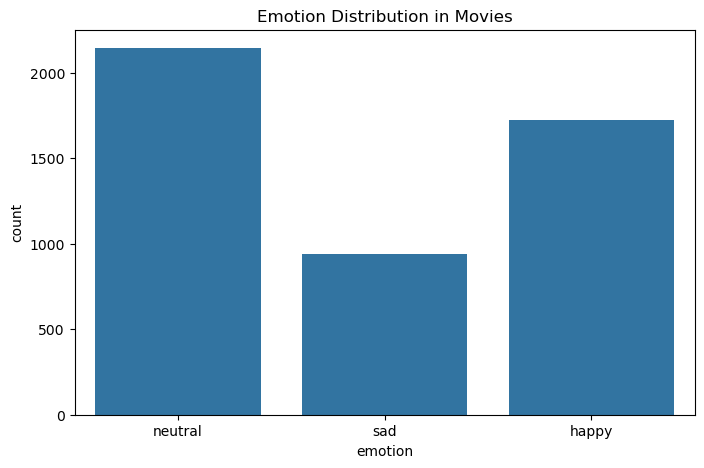

In [75]:
# Calculate sentiment polarity (now using strings)
movie['sentiment'] = movie['overview'].apply(
    lambda x: TextBlob(str(x)).sentiment.polarity  # Ensure x is a string
)

# Assign emotion labels
movie['emotion'] = movie['sentiment'].apply(
    lambda x: 'happy' if x > 0.1 else 'sad' if x < -0.1 else 'neutral'
)

# Plot emotion distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=movie['emotion'])
plt.title('Emotion Distribution in Movies')
plt.show()

In [73]:
from textblob import TextBlob

In [77]:
# Map genres to social contexts
social_context_mapping = {
    'Action': 'friends', 'Horror': 'friends', 
    'Romance': 'partner', 'Drama': 'alone', 
    'Comedy': 'friends', 'Documentary': 'alone'
}

def assign_social_context(genres):
    # genres is already a list, no need to split()
    contexts = [social_context_mapping.get(genre, 'neutral') for genre in genres]
    return ' '.join(set(contexts))  # Remove duplicates and join




In [79]:
movie['social_context'] = movie['genres'].apply(assign_social_context)

In [81]:
movie.head()

,movie_id,title,overview,genres,keywords,cast,crew,release_date,vote_average,vote_count,release_year,sentiment,emotion,social_context
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],2009-12-10,7.2,11800,2009,0.041667,neutral,neutral friends
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],2007-05-19,6.9,4500,2007,-0.083333,neutral,neutral friends
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],2015-10-26,6.3,4466,2015,-0.306250,sad,neutral friends
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],2012-07-16,7.6,9106,2012,-0.044805,neutral,neutral alone friends
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],2012-03-07,6.1,2124,2012,-0.016667,neutral,neutral friends


In [89]:
movie['tags'] = (
    movie['overview'].astype(str) + ' ' +
    movie['genres'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x)) + ' ' +
    movie['emotion'].astype(str) + ' ' +
    movie['social_context'].astype(str) + ' '+
    movie['crew'].astype(str)+ ' ' +
    movie['cast'].astype(str) + ' ' +
     movie['keywords'].astype(str) 
  
)



In [85]:
movie.head()

,movie_id,title,overview,genres,keywords,cast,crew,release_date,vote_average,vote_count,release_year,sentiment,emotion,social_context,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],2009-12-10,7.2,11800,2009,0.041667,neutral,neutral friends,"['In', 'the', '22nd', 'century,', 'a', 'parapl..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],2007-05-19,6.9,4500,2007,-0.083333,neutral,neutral friends,"['Captain', 'Barbossa,', 'long', 'believed', '..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],2015-10-26,6.3,4466,2015,-0.306250,sad,neutral friends,"['A', 'cryptic', 'message', 'from', 'Bond’s', ..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],2012-07-16,7.6,9106,2012,-0.044805,neutral,neutral alone friends,"['Following', 'the', 'death', 'of', 'District'..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],2012-03-07,6.1,2124,2012,-0.016667,neutral,neutral friends,"['John', 'Carter', 'is', 'a', 'war-weary,', 'f..."


In [91]:
cleaned_movei = movie

In [117]:
df = cleaned_movei[['movie_id', 'title', 'vote_average', 'release_year', 'sentiment', 'emotion', 'social_context', 'tags', 'genres']]

In [119]:
df.head()

,movie_id,title,vote_average,release_year,sentiment,emotion,social_context,tags,genres
0,19995,Avatar,7.2,2009,0.041667,neutral,neutral friends,"['In', 'the', '22nd', 'century,', 'a', 'parapl...","[Action, Adventure, Fantasy, ScienceFiction]"
1,285,Pirates of the Caribbean: At World's End,6.9,2007,-0.083333,neutral,neutral friends,"['Captain', 'Barbossa,', 'long', 'believed', '...","[Adventure, Fantasy, Action]"
2,206647,Spectre,6.3,2015,-0.306250,sad,neutral friends,"['A', 'cryptic', 'message', 'from', 'Bond’s', ...","[Action, Adventure, Crime]"
3,49026,The Dark Knight Rises,7.6,2012,-0.044805,neutral,neutral alone friends,"['Following', 'the', 'death', 'of', 'District'...","[Action, Crime, Drama, Thriller]"
4,49529,John Carter,6.1,2012,-0.016667,neutral,neutral friends,"['John', 'Carter', 'is', 'a', 'war-weary,', 'f...","[Action, Adventure, ScienceFiction]"


In [121]:
!pip install fuzzywuzzy python-Levenshtein

In [123]:

from fuzzywuzzy import process
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity



# Create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['tags'])

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)



In [125]:
# ========== 3. RECOMMENDATION FUNCTION ==========
def recommend_by_title(user_input):
    # Fuzzy match title
    def find_closest_match(query):
        titles = df['title'].tolist()
        match, score = process.extractOne(query, titles)
        return match if score > 80 else None
    
    closest_title = find_closest_match(user_input)
    
    if not closest_title:
        return "Movie not found. Try another title!"
    
    # Get index and similarity scores
    idx = df[df['title'] == closest_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort and get top 5
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]
    return df.iloc[[i[0] for i in sim_scores]][['title', 'genres', 'emotion']]

# Example usage:
print(recommend_by_title("Avtar"))  # Handles typos

                        title  \
3729            Falcon Rising   
582       Battle: Los Angeles   
3607                Apollo 18   
47    Star Trek Into Darkness   
539                Titan A.E.   

                                                 genres  emotion  
3729                                [Adventure, Action]  neutral  
582                            [Action, ScienceFiction]    happy  
3607                 [Horror, Thriller, ScienceFiction]  neutral  
47                  [Action, Adventure, ScienceFiction]  neutral  
539   [Animation, Action, ScienceFiction, Family, Ad...  neutral  


In [133]:
recommend_by_title("Avenger")

,title,genres,emotion
68,Iron Man,"[Action, ScienceFiction, Adventure]",sad
16,The Avengers,"[ScienceFiction, Action, Adventure]",neutral
31,Iron Man 3,"[Action, Adventure, ScienceFiction]",sad
79,Iron Man 2,"[Adventure, Action, ScienceFiction]",neutral
26,Captain America: Civil War,"[Adventure, Action, ScienceFiction]",neutral


In [141]:
# Clean the DataFrame before any operations
def clean_data(df):
    # Fill missing values
    df['emotion'].fillna('neutral', inplace=True)
    df['genres'].fillna('', inplace=True)
    df['social_context'].fillna('neutral', inplace=True)
    df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce').fillna(0).astype(int)
    df['vote_average'].fillna(0, inplace=True)
    df['sentiment'].fillna(0, inplace=True)
    return df

movies_clean = clean_data(df.copy())

C:\Users\HP\AppData\Local\Temp\ipykernel_8684\4071026069.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['emotion'].fillna('neutral', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_8684\4071026069.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [143]:
df.isnull().sum()

movie_id          0
title             0
vote_average      0
release_year      0
sentiment         0
emotion           0
social_context    0
tags              0
genres            0
dtype: int64

In [153]:
def recommend_by_filters(emotion=None, genre=None, social_context=None, release_year=None):
    # Use cleaned data
    filtered = df.copy()
    
    # Apply filters (with NaN handling)
    if emotion:
        filtered = filtered[filtered['emotion'].str.lower() == emotion.lower()]
    if genre:
        filtered = filtered[filtered['genres'].str.contains(genre, case=False, na=False)]
    if social_context:
        filtered = filtered[filtered['social_context'].str.contains(social_context, case=False, na=False)]
    if release_year:
        if release_year == 'recent':
            filtered = filtered[filtered['release_year'] >= 2020]
        elif release_year == 'classic':
            filtered = filtered[filtered['release_year'] < 2000]

    # Fallback to popular movies if no results
    if filtered.empty:
        return movies_clean.sort_values(['vote_average', 'release_year'], ascending=[False, False]).head(5)
    
    # Calculate score
    filtered['score'] = (
        0.5 * filtered['vote_average'] +
        0.3 * (filtered['release_year'] / 2023) +  # Normalize release year
        0.4 * filtered['sentiment'].abs()          # Use absolute sentiment
    )
    
    # Return top 5 movies
    return filtered.sort_values('score', ascending=False).head(5)[['title', 'genres', 'emotion', 'release_year']]

In [155]:
# Test Case 1: Valid filters
print(recommend_by_filters(emotion="happy", genre="Comedy", social_context="friends"))

# Test Case 2: No matches (fallback to popular movies)
print(recommend_by_filters(emotion="unknown_emotion"))

      movie_id                  title  vote_average  release_year  sentiment  \
4252    361505  Me You and Five Bucks          10.0          2015   0.092154   
4668     40963         Little Big Top          10.0          2006  -0.050000   
3522     89861       Stiff Upper Lips          10.0          1998   0.131548   
4050     78373  Dancer, Texas Pop. 81          10.0          1998   0.343750   
3997    346081              Sardaarji           9.5          2015   0.000000   

      emotion         social_context  \
4252  neutral  alone partner friends   
4668  neutral                friends   
3522    happy                friends   
4050    happy  neutral alone friends   
3997  neutral                          

                                                   tags  \
4252  ['A', 'womanizing', 'yet', 'lovable', 'loser,'...   
4668  ['An', 'aging', 'out', 'of', 'work', 'clown', ...   
3522  ['Stiff', 'Upper', 'Lips', 'is', 'a', 'broad',...   
4050  ['Four', 'guys,', 'best', 'friends,'

In [149]:
recommend_by_title("batma")

,title,genres,emotion
1361,Batman,"[Fantasy, Action]",neutral
210,Batman & Robin,"[Action, Crime, Fantasy]",neutral
428,Batman Returns,"[Action, Fantasy]",happy
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",neutral
119,Batman Begins,"[Action, Crime, Drama]",sad


In [151]:
recommend_by_filters(emotion="happy", genre="Comedy", social_context="friends")

,movie_id,title,vote_average,release_year,sentiment,emotion,social_context,tags,genres
4252,361505,Me You and Five Bucks,10.0,2015,0.092154,neutral,alone partner friends,"['A', 'womanizing', 'yet', 'lovable', 'loser,'...","[Romance, Comedy, Drama]"
4668,40963,Little Big Top,10.0,2006,-0.050000,neutral,friends,"['An', 'aging', 'out', 'of', 'work', 'clown', ...",[Comedy]
3522,89861,Stiff Upper Lips,10.0,1998,0.131548,happy,friends,"['Stiff', 'Upper', 'Lips', 'is', 'a', 'broad',...",[Comedy]
4050,78373,"Dancer, Texas Pop. 81",10.0,1998,0.343750,happy,neutral alone friends,"['Four', 'guys,', 'best', 'friends,', 'have', ...","[Comedy, Drama, Family]"
3997,346081,Sardaarji,9.5,2015,0.000000,neutral,,"['A', 'ghost', 'hunter', 'uses', 'bottles', 't...",[]
